In [1]:
# Importing only the necessary libraries for building the model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset to review its structure and contents
lego_data_file_path = 'dataset/LEGO Sets and Prices Over Time/LEGO Sets and Prices Over Time.csv'
lego_data = pd.read_csv(lego_data_file_path)

# Display the first few rows to understand the structure of the dataset
lego_data.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


# Data Filtering

In [3]:
# Filter the dataset for entries from 2019 to the present
lego_data_filtered = lego_data[lego_data['Year'] >= 2019]

# Check for missing values and data types in the filtered dataset
missing_data = lego_data_filtered.isnull().sum()
data_types = lego_data_filtered.dtypes

# Display the results
missing_data, data_types

(Set_ID                 0
 Name                   0
 Year                   0
 Theme                  0
 Theme_Group           19
 Subtheme             289
 Category               0
 Packaging              0
 Num_Instructions       0
 Availability           0
 Pieces               207
 Minifigures         1006
 Owned                101
 Rating                 0
 USD_MSRP             841
 Total_Quantity       417
 Current_Price       1000
 dtype: int64,
 Set_ID               object
 Name                 object
 Year                  int64
 Theme                object
 Theme_Group          object
 Subtheme             object
 Category             object
 Packaging            object
 Num_Instructions      int64
 Availability         object
 Pieces              float64
 Minifigures         float64
 Owned               float64
 Rating              float64
 USD_MSRP            float64
 Total_Quantity      float64
 Current_Price       float64
 dtype: object)

In [4]:
# Drop rows where 'Current_Price' is missing
lego_data_filtered_dropped_current_price = lego_data_filtered.dropna(subset=['Current_Price'])

# Drop the specified columns
lego_data_filtered_dropped_columns = lego_data_filtered_dropped_current_price.drop(columns=['Set_ID', 'Subtheme', 'Packaging', 'Num_Instructions', 'Availability', 'Minifigures'])

# Check for remaining missing values after dropping the columns
missing_data_after_dropped_columns = lego_data_filtered_dropped_columns.isnull().sum()

# Display the results
missing_data_after_dropped_columns

Name                0
Year                0
Theme               0
Theme_Group         0
Category            0
Pieces             14
Owned               0
Rating              0
USD_MSRP          316
Total_Quantity      0
Current_Price       0
dtype: int64

In [5]:
lego_data_filtered_dropped_columns

,Name,Year,Theme,Theme_Group,Category,Pieces,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
12436,Corner Garage,2019,Creator Expert,Model making,Normal,2569.0,17423.0,4.1,199.99,81.0,258.3622
12437,Ford Mustang,2019,Creator Expert,Model making,Normal,1471.0,15100.0,4.5,169.99,4.0,130.0000
12438,NASA Apollo 11 Lunar Lander,2019,Creator Expert,Model making,Normal,1087.0,18817.0,4.4,99.99,19.0,85.0000
12439,Gingerbread House,2019,Creator Expert,Model making,Normal,1477.0,14741.0,4.2,99.99,57.0,127.0000
12440,Harley-Davidson Fat Boy,2019,Creator Expert,Model making,Normal,1023.0,7107.0,4.2,99.99,19.0,111.9900
...,...,...,...,...,...,...,...,...,...,...,...
14896,Temple of the Golden Idol,2023,Indiana Jones,Licensed,Normal,1545.0,1415.0,4.8,149.99,1.0,170.1470
14897,Monkie Kid's Combi Mech,2023,Monkie Kid,Action/Adventure,Normal,277.0,249.0,0.0,19.99,1.0,32.0000
14908,Master Wu vs. Ghost Archer,2023,Ninjago,Action/Adventure,Other,12.0,161.0,0.0,NaN,1.0,9.9500
14922,"Cave Explorer, Creeper and Slime",2023,Minecraft,Licensed,Other,30.0,226.0,0.0,NaN,1.0,7.0000


In [6]:
# Impute missing numerical values with the median
numerical_columns = lego_data_filtered_dropped_columns.select_dtypes(include=['float64']).columns
lego_data_filtered_dropped_columns[numerical_columns] = lego_data_filtered_dropped_columns[numerical_columns].apply(lambda x: x.fillna(x.median()))

# Impute missing categorical values with "Unknown"
categorical_columns = lego_data_filtered_dropped_columns.select_dtypes(include=['object']).columns
lego_data_filtered_dropped_columns[categorical_columns] = lego_data_filtered_dropped_columns[categorical_columns].apply(lambda x: x.fillna('Unknown'))

# Make a copy of the new data
model_lego_data_cleaned = lego_data_filtered_dropped_columns.copy()

# Check if any missing values remain
missing_data_after_imputation = model_lego_data_cleaned.isnull().sum()

# Display the results
missing_data_after_imputation

Name              0
Year              0
Theme             0
Theme_Group       0
Category          0
Pieces            0
Owned             0
Rating            0
USD_MSRP          0
Total_Quantity    0
Current_Price     0
dtype: int64

#### Clean Dataset Summary:
    Numerical Features: Fully imputed using the median.
    Categorical Features: Missing values replaced with "Unknown."

# Feature Engineering

In [7]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
model_lego_data_cleaned['Theme_ID'] = label_encoder.fit_transform(model_lego_data_cleaned['Theme'])
model_lego_data_cleaned['Theme_Group_ID'] = label_encoder.fit_transform(model_lego_data_cleaned['Theme_Group'])
model_lego_data_cleaned['Category_ID'] = label_encoder.fit_transform(model_lego_data_cleaned['Category'])

In [8]:
# Feature Engineering
# Calculate Age of Set (current year - Year)
current_year = 2024
model_lego_data_cleaned['Age_of_Set'] = current_year - model_lego_data_cleaned['Year']
model_lego_data_cleaned['Age_of_Set'] = model_lego_data_cleaned['Age_of_Set'].astype('float64')

# Calculate Price per Piece, avoiding division by zero
model_lego_data_cleaned['Price_per_Piece'] = np.where(
    model_lego_data_cleaned['Pieces'] > 0,
    model_lego_data_cleaned['USD_MSRP'] / model_lego_data_cleaned['Pieces'],
    np.nan
)

# Impute NaN values in Price_per_Piece with the median of the column
model_lego_data_cleaned['Price_per_Piece'] = model_lego_data_cleaned['Price_per_Piece'].fillna(model_lego_data_cleaned['Price_per_Piece'].median())

# Feature Engineering: Create Age_to_Price_Ratio
model_lego_data_cleaned['Age_to_Price_Ratio'] = model_lego_data_cleaned['Age_of_Set'] / model_lego_data_cleaned['USD_MSRP']

# Convert Theme_Group_ID to numeric before interaction
model_lego_data_cleaned['Theme_Group_ID'] = model_lego_data_cleaned['Theme_Group_ID'].astype('float64')

# Interaction Term: Theme_Group_ID x Total_Quantity
model_lego_data_cleaned['Theme_Quantity_Interaction'] = (
    model_lego_data_cleaned['Theme_Group_ID'] * model_lego_data_cleaned['Total_Quantity']
)

# Price Elasticity Proxy: Current_Price / USD_MSRP (avoiding division by zero)
model_lego_data_cleaned['Price_Elasticity'] = np.where(
    model_lego_data_cleaned['USD_MSRP'] > 0,
    model_lego_data_cleaned['Current_Price'] / model_lego_data_cleaned['USD_MSRP'],
    1
)

# Profit Margin: Current_Price - USD_MSRP
model_lego_data_cleaned['Profit_Margin'] = (
    model_lego_data_cleaned['Current_Price'] - model_lego_data_cleaned['USD_MSRP']
)

# Relative Quantity: Total_Quantity as a proportion of total market quantity
total_quantity_sum = model_lego_data_cleaned['Total_Quantity'].sum()
model_lego_data_cleaned['Relative_Quantity'] = model_lego_data_cleaned['Total_Quantity'] / total_quantity_sum

# Lag Features: Shift Total_Quantity and Current_Price by 1 year for time-series effects
model_lego_data_cleaned['Lag_Total_Quantity'] = model_lego_data_cleaned['Total_Quantity'].shift(1)
model_lego_data_cleaned['Lag_Current_Price'] = model_lego_data_cleaned['Current_Price'].shift(1)

# Drop rows with NaN values caused by lag features
model_lego_data_cleaned.dropna(subset=['Lag_Total_Quantity', 'Lag_Current_Price'], inplace=True)

# Check the first few rows to confirm the new features
model_lego_data_cleaned[['Age_of_Set','Price_per_Piece','Age_to_Price_Ratio','Theme_Quantity_Interaction', 'Price_Elasticity','Profit_Margin',
    'Relative_Quantity', 'Lag_Total_Quantity', 'Lag_Current_Price']].describe()

,Age_of_Set,Price_per_Piece,Age_to_Price_Ratio,Theme_Quantity_Interaction,Price_Elasticity,Profit_Margin,Relative_Quantity,Lag_Total_Quantity,Lag_Current_Price
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,3.375584,0.560591,0.153130,101.062041,1.061428,-0.312933,0.000665,21.965977,50.754546
std,1.267744,3.903165,0.163377,276.400547,1.100814,39.471539,0.001601,52.724903,76.553787
min,1.000000,0.019221,0.002000,0.000000,0.024895,-174.990000,0.000030,1.000000,0.730000
25%,2.000000,0.087730,0.050008,8.000000,0.650023,-18.010000,0.000061,2.000000,12.000000
50%,3.000000,0.118140,0.100033,28.000000,0.893973,-2.490000,0.000213,7.000000,25.990000
75%,4.500000,0.201919,0.200080,84.000000,1.200040,5.000000,0.000577,19.000000,57.389500
max,5.000000,107.475000,1.253133,6378.000000,19.930930,567.738600,0.032282,1063.000000,970.000000


In [9]:
# Convert to categorical dtype
model_lego_data_cleaned['Theme_ID'] = model_lego_data_cleaned['Theme_ID'].astype('category')
model_lego_data_cleaned['Theme_Group_ID'] = model_lego_data_cleaned['Theme_Group_ID'].astype('category')
model_lego_data_cleaned['Category_ID'] = model_lego_data_cleaned['Category_ID'].astype('category')

#### Label Encoding Results:
    The categorical columns (Theme, Theme_Group, Category) have been successfully encoded and converted to categorical data types. Here's a preview of the encoded values:
    
    Theme: Numerical encoding for the LEGO theme.
    Theme_Group: Encoded grouping of the themes.
    Category: Encoded LEGO set categories.

In [10]:
# Check the first few rows to confirm label encoding and dtype
model_lego_data_cleaned[['Theme', 'Theme_ID', 'Theme_Group', 'Theme_Group_ID', 'Category', 'Category_ID']]

,Theme,Theme_ID,Theme_Group,Theme_Group_ID,Category,Category_ID
12437,Creator Expert,9,Model making,6.0,Normal,2
12438,Creator Expert,9,Model making,6.0,Normal,2
12439,Creator Expert,9,Model making,6.0,Normal,2
12440,Creator Expert,9,Model making,6.0,Normal,2
12441,Disney,11,Licensed,4.0,Normal,2
...,...,...,...,...,...,...
14896,Indiana Jones,21,Licensed,4.0,Normal,2
14897,Monkie Kid,28,Action/Adventure,0.0,Normal,2
14908,Ninjago,29,Action/Adventure,0.0,Other,3
14922,Minecraft,25,Licensed,4.0,Other,3


In [11]:
model_lego_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 12437 to 14925
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Name                        1499 non-null   object  
 1   Year                        1499 non-null   int64   
 2   Theme                       1499 non-null   object  
 3   Theme_Group                 1499 non-null   object  
 4   Category                    1499 non-null   object  
 5   Pieces                      1499 non-null   float64 
 6   Owned                       1499 non-null   float64 
 7   Rating                      1499 non-null   float64 
 8   USD_MSRP                    1499 non-null   float64 
 9   Total_Quantity              1499 non-null   float64 
 10  Current_Price               1499 non-null   float64 
 11  Theme_ID                    1499 non-null   category
 12  Theme_Group_ID              1499 non-null   category
 13  Category_ID       

In [12]:
model_lego_data_cleaned

,Name,Year,Theme,Theme_Group,Category,Pieces,Owned,Rating,USD_MSRP,Total_Quantity,...,Category_ID,Age_of_Set,Price_per_Piece,Age_to_Price_Ratio,Theme_Quantity_Interaction,Price_Elasticity,Profit_Margin,Relative_Quantity,Lag_Total_Quantity,Lag_Current_Price
12437,Ford Mustang,2019,Creator Expert,Model making,Normal,1471.0,15100.0,4.5,169.99,4.0,...,2,5.0,0.115561,0.029413,24.0,0.764751,-39.990,0.000121,81.0,258.3622
12438,NASA Apollo 11 Lunar Lander,2019,Creator Expert,Model making,Normal,1087.0,18817.0,4.4,99.99,19.0,...,2,5.0,0.091987,0.050005,114.0,0.850085,-14.990,0.000577,4.0,130.0000
12439,Gingerbread House,2019,Creator Expert,Model making,Normal,1477.0,14741.0,4.2,99.99,57.0,...,2,5.0,0.067698,0.050005,342.0,1.270127,27.010,0.001731,19.0,85.0000
12440,Harley-Davidson Fat Boy,2019,Creator Expert,Model making,Normal,1023.0,7107.0,4.2,99.99,19.0,...,2,5.0,0.097742,0.050005,114.0,1.120012,12.000,0.000577,57.0,127.0000
12441,Woody & RC,2019,Disney,Licensed,Normal,69.0,4402.0,3.7,9.99,29.0,...,2,5.0,0.144783,0.500501,116.0,1.496496,4.960,0.000881,19.0,111.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14896,Temple of the Golden Idol,2023,Indiana Jones,Licensed,Normal,1545.0,1415.0,4.8,149.99,1.0,...,2,1.0,0.097081,0.006667,4.0,1.134389,20.157,0.000030,4.0,33.1000
14897,Monkie Kid's Combi Mech,2023,Monkie Kid,Action/Adventure,Normal,277.0,249.0,0.0,19.99,1.0,...,2,1.0,0.072166,0.050025,0.0,1.600800,12.010,0.000030,1.0,170.1470
14908,Master Wu vs. Ghost Archer,2023,Ninjago,Action/Adventure,Other,12.0,161.0,0.0,29.99,1.0,...,3,1.0,2.499167,0.033344,0.0,0.331777,-20.040,0.000030,1.0,32.0000
14922,"Cave Explorer, Creeper and Slime",2023,Minecraft,Licensed,Other,30.0,226.0,0.0,29.99,1.0,...,3,1.0,0.999667,0.033344,4.0,0.233411,-22.990,0.000030,1.0,9.9500


In [13]:
df = pd.DataFrame(model_lego_data_cleaned)

# Save the DataFrame to a CSV file
df.to_csv('model_lego_data_cleaned.csv', index=False)

print("DataFrame saved to 'model_lego_data_cleaned.csv'")

DataFrame saved to 'model_lego_data_cleaned.csv'


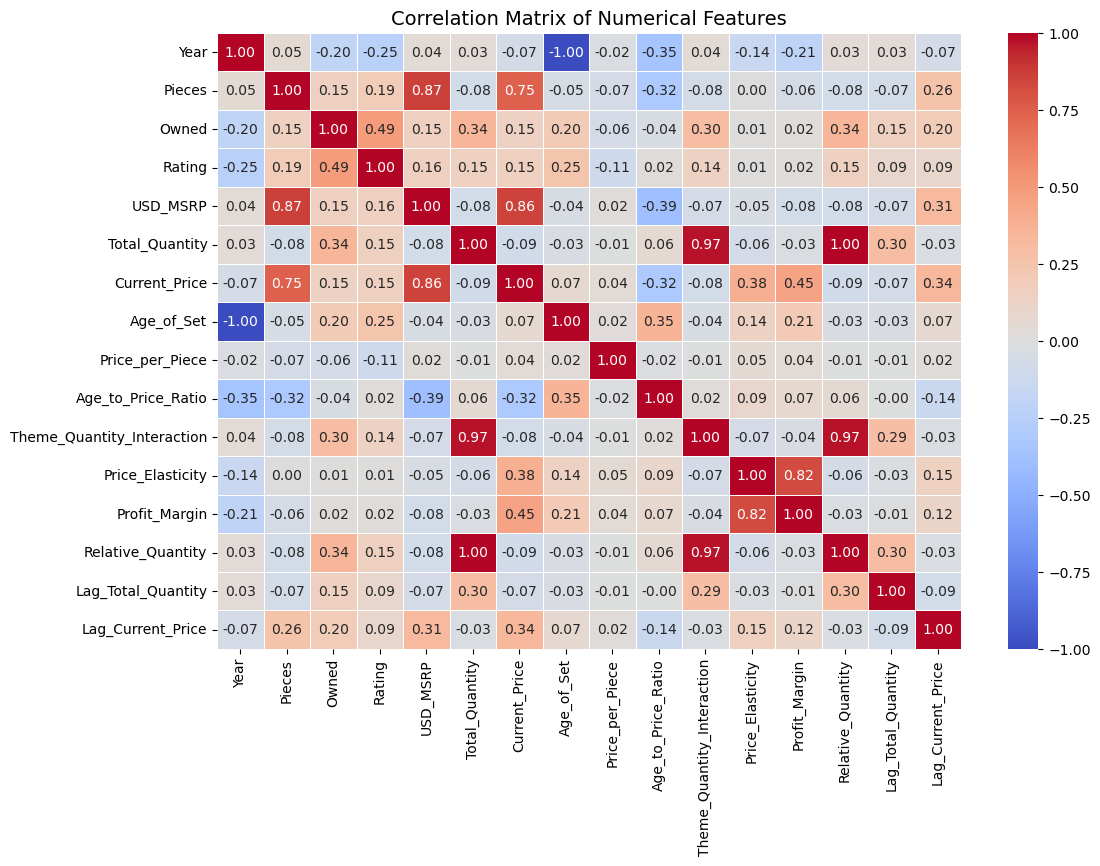

,Year,Pieces,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price,Age_of_Set,Price_per_Piece,Age_to_Price_Ratio,Theme_Quantity_Interaction,Price_Elasticity,Profit_Margin,Relative_Quantity,Lag_Total_Quantity,Lag_Current_Price
Year,1.000000,0.052404,-0.196424,-0.248471,0.042060,0.032702,-0.068241,-1.000000,-0.023651,-0.352348,0.041796,-0.143345,-0.205121,0.032702,0.031728,-0.070092
Pieces,0.052404,1.000000,0.153407,0.188136,0.865008,-0.082933,0.745449,-0.052404,-0.065325,-0.320269,-0.076517,0.000309,-0.060595,-0.082933,-0.072319,0.263935
Owned,-0.196424,0.153407,1.000000,0.485633,0.151065,0.344369,0.145115,0.196424,-0.063039,-0.042455,0.298907,0.011799,0.018307,0.344369,0.151441,0.195233
Rating,-0.248471,0.188136,0.485633,1.000000,0.156528,0.152897,0.149720,0.248471,-0.107438,0.017265,0.136325,0.014122,0.017725,0.152897,0.089321,0.091286
USD_MSRP,0.042060,0.865008,0.151065,0.156528,1.000000,-0.081274,0.857071,-0.042060,0.021295,-0.394620,-0.068168,-0.045590,-0.079168,-0.081274,-0.068788,0.314639
Total_Quantity,0.032702,-0.082933,0.344369,0.152897,-0.081274,1.000000,-0.087485,-0.032702,-0.007523,0.055384,0.974266,-0.063178,-0.028061,1.000000,0.304526,-0.025432
Current_Price,-0.068241,0.745449,0.145115,0.149720,0.857071,-0.087485,1.000000,0.068241,0.041340,-0.317860,-0.079844,0.384792,0.445729,-0.087485,-0.066699,0.343020
Age_of_Set,-1.000000,-0.052404,0.196424,0.248471,-0.042060,-0.032702,0.068241,1.000000,0.023651,0.352348,-0.041796,0.143345,0.205121,-0.032702,-0.031728,0.070092
Price_per_Piece,-0.023651,-0.065325,-0.063039,-0.107438,0.021295,-0.007523,0.041340,0.023651,1.000000,-0.023305,-0.007187,0.049952,0.042988,-0.007523,-0.007498,0.020970
Age_to_Price_Ratio,-0.352348,-0.320269,-0.042455,0.017265,-0.394620,0.055384,-0.317860,0.352348,-0.023305,1.000000,0.023001,0.089252,0.070632,0.055384,-0.002414,-0.138335


In [14]:
# Select only numerical columns (float and int types) for correlation
numerical_columns = model_lego_data_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.savefig("images/Correlation Matrix of Numerical Features.png")
plt.show()

correlation_matrix

### Key Insights:
#### Strong Positive Correlations:
 - Pieces vs. USD_MSRP: 0.865, indicating that sets with more pieces tend to have higher MSRP values.
 - Current_Price vs. USD_MSRP: 0.857, reflecting that MSRP closely influences the current price.

#### Strong Negative Correlations:
 - Year vs. Age_of_Set: −1.0, a perfect negative correlation since the age is derived directly from the year.
 - Age_to_Price_Ratio vs. USD_MSRP: −0.395, showing that sets with higher MSRP have lower age-to-price ratios.

#### Moderate Positive Correlations:
 - Total_Quantity vs. Relative_Quantity: 1.0, by definition, as relative quantity is a proportion of total quantity.
 - Profit_Margin vs. Price_Elasticity: 0.824, indicating sets with higher price elasticity tend to yield higher profit margins.

#### Weak or No Correlation:
 - Pieces vs. Theme_Group_ID: 0.003, suggesting no meaningful relationship between these features.
 - Category_ID vs. Most Features: Indicates limited utility in its current form for predictive modeling.

# The Prediction Model

In [15]:
# Prepare feature set and target variable
X = model_lego_data_cleaned[
    [
        'Total_Quantity', 'Theme_Group_ID', 'Age_of_Set', 'Price_per_Piece',
        'Theme_Quantity_Interaction', 'Price_Elasticity', 'Profit_Margin',
        'Relative_Quantity', 'Lag_Total_Quantity', 'Lag_Current_Price'
    ]
]
y = model_lego_data_cleaned['Current_Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

Mean Absolute Error: 11.591982196666661
Mean Squared Error: 629.5325594204934
Root Mean Squared Error: 25.090487428914038
R2 Score: 0.8236273041459643


The Random Forest Regressor achieved the following evaluation metrics:
- Mean Absolute Error (MAE): 11.59 (average absolute deviation from the true price).
- Mean Squared Error (MSE): 629.53 (captures larger deviations).
- Root Mean Squared Error (RMSE): 25.09 (average magnitude of error, accounting for variance).
- 𝑅2 Score: 0.82 (model explains 82% of the variance in Current_Price).

These results indicate that the model is performing well, capturing the relationships between the engineered features and the target variable.

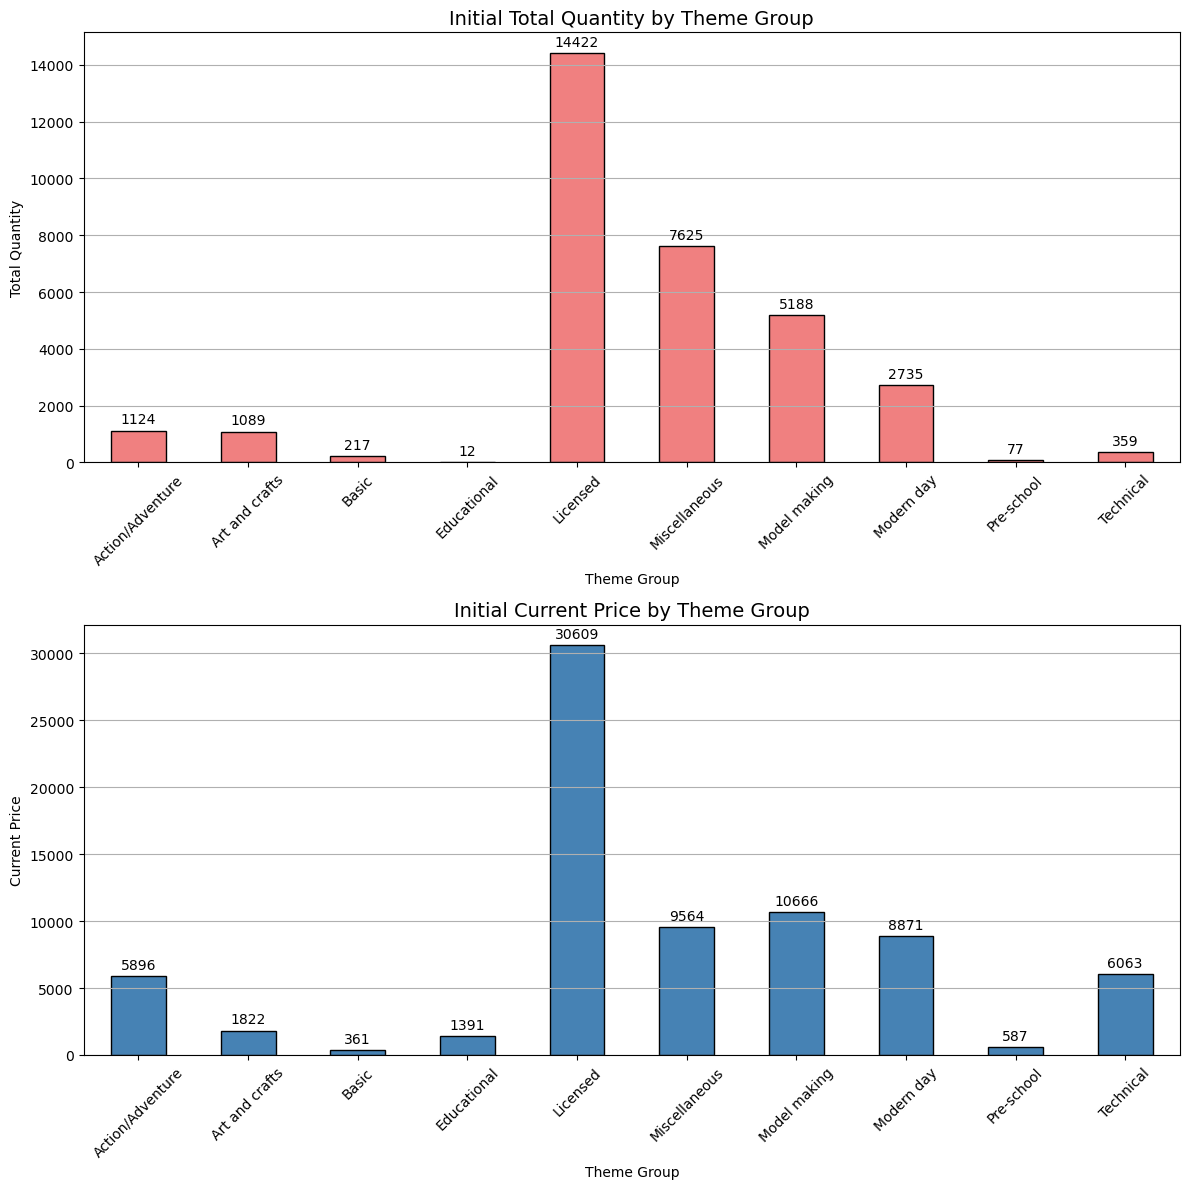

,Total_Quantity,Current_Price
Theme_Group,,
Action/Adventure,1124.0,5895.6306
Art and crafts,1089.0,1822.0517
Basic,217.0,360.6940
Educational,12.0,1390.5856
Licensed,14422.0,30608.9010
Miscellaneous,7625.0,9564.4962
Model making,5188.0,10666.2956
Modern day,2735.0,8870.8483
Pre-school,77.0,587.3412


In [16]:
# Aggregate the initial values of Total_Quantity and Current_Price by Theme_Group
initial_values = model_lego_data_cleaned.groupby('Theme_Group')[['Total_Quantity', 'Current_Price']].sum()

# Plot initial Total_Quantity and Current_Price by Theme_Group
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plot Total_Quantity
total_quantity_bars = initial_values['Total_Quantity'].plot(kind='bar', ax=ax[0], color='lightcoral', edgecolor='black')
ax[0].set_title('Initial Total Quantity by Theme Group', fontsize=14)
ax[0].set_xlabel('Theme Group')
ax[0].set_ylabel('Total Quantity')
ax[0].grid(axis='y')
ax[0].tick_params(axis='x', rotation=45)

# Add values on top of the bars for Total_Quantity
for p in total_quantity_bars.patches:
    height = p.get_height()
    ax[0].annotate(f'{height:.0f}', 
                   xy=(p.get_x() + p.get_width() / 2., height), 
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords='offset points', 
                   ha='center', va='bottom')

# Plot Current_Price
current_price_bars = initial_values['Current_Price'].plot(kind='bar', ax=ax[1], color='steelblue', edgecolor='black')
ax[1].set_title('Initial Current Price by Theme Group', fontsize=14)
ax[1].set_xlabel('Theme Group')
ax[1].set_ylabel('Current Price')
ax[1].grid(axis='y')
ax[1].tick_params(axis='x', rotation=45)

# Add values on top of the bars for Current_Price
for p in current_price_bars.patches:
    height = p.get_height()
    ax[1].annotate(f'{height:.0f}', 
                   xy=(p.get_x() + p.get_width() / 2., height), 
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords='offset points', 
                   ha='center', va='bottom')

plt.tight_layout()
plt.savefig("images/Initial Current Price by Theme Group.png")
plt.show()

# Display the initial values for reference
initial_values

# Simulation

### Percentage Increase for Theme Groups:
- Theme Group ID 1: Increased by 10%.
- Theme Group ID 2: Increased by 20%.
- Theme Group ID 3: Increased by 15%.

This simulation aimed to evaluate how targeted increases in inventory (Total_Quantity) would affect Predicted Sales (Current Price) for each Theme_Group_ID. The analysis highlighted the groups with the highest sales potential and those with minimal impact after the simulated increase.

The goal of this scenario was to identify which Theme Groups offer the best return on investment (ROI) when inventory levels are adjusted, enabling LEGO to optimize its strategies for inventory management, marketing, and pricing.

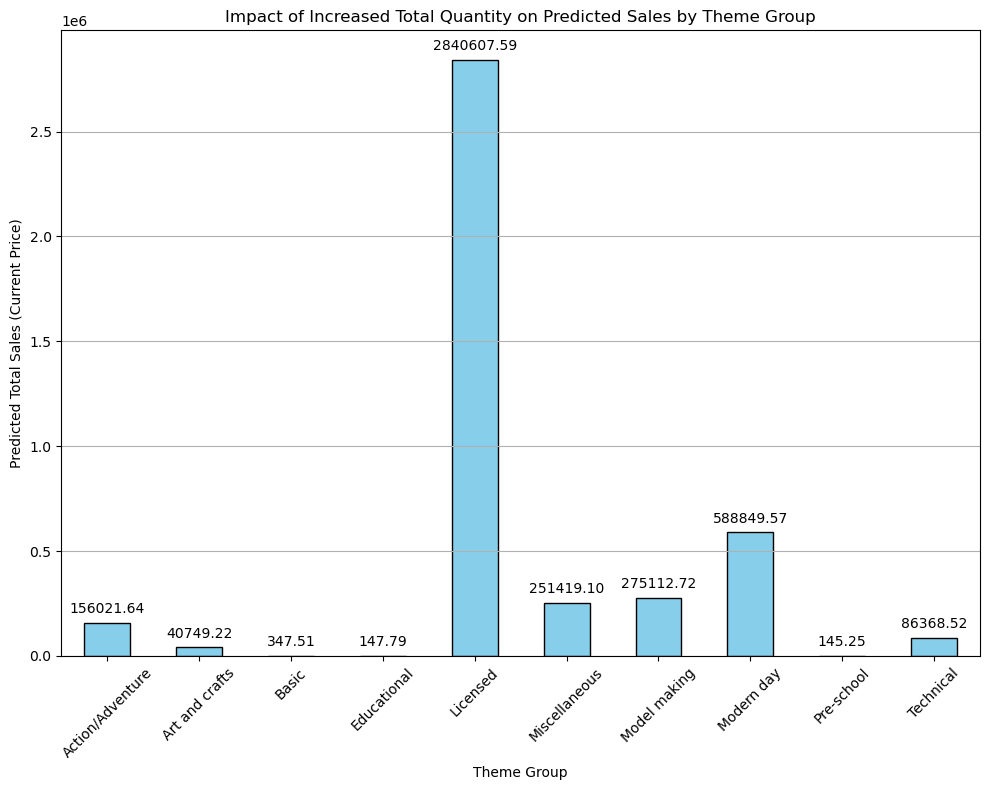

Theme_Group
Licensed            2.840608e+06
Modern day          5.888496e+05
Model making        2.751127e+05
Miscellaneous       2.514191e+05
Action/Adventure    1.560216e+05
Technical           8.636852e+04
Art and crafts      4.074922e+04
Basic               3.475061e+02
Educational         1.477934e+02
Pre-school          1.452473e+02
Name: Predicted_Current_Price, dtype: float64

In [17]:
# Simulate an increase in Total_Quantity for specific Theme_Groups
# Define percentage increases for each Theme_Group_ID
theme_group_increase = {
    1: 0.10,  # Increase by 10% for Theme_Group_ID 1
    2: 0.20,  # Increase by 20% for Theme_Group_ID 2
    3: 0.15,  # Increase by 15% for Theme_Group_ID 3
}

# Copy the test set for simulation
simulation_data = X_test.copy()

# Apply the increase in Total_Quantity for the specified Theme_Group_IDs
for theme_group_id, increase in theme_group_increase.items():
    simulation_data.loc[
        simulation_data['Theme_Group_ID'] == theme_group_id, 'Total_Quantity'
    ] *= (1 + increase)

# Standardize the simulated data
simulation_data_scaled = scaler.transform(simulation_data)

# Predict the sales with increased Total_Quantity
simulated_sales_predictions = model.predict(simulation_data_scaled)

# Aggregate predictions by Theme_Group_ID for analysis
simulation_data['Predicted_Current_Price'] = simulated_sales_predictions

# Merge with original data to get Theme_Group names
simulation_data = simulation_data.merge(
    model_lego_data_cleaned[['Theme_Group_ID', 'Theme_Group']], on='Theme_Group_ID', how='left'
)

# Aggregate predictions by Theme_Group for analysis
sales_by_theme_group = simulation_data.groupby('Theme_Group')['Predicted_Current_Price'].sum()

# Plot the impact of increased quantity on sales
plt.figure(figsize=(10, 8))
ax = sales_by_theme_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.title('Impact of Increased Total Quantity on Predicted Sales by Theme Group')
plt.xlabel('Theme Group')
plt.ylabel('Predicted Total Sales (Current Price)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("images/Impact of Increased Total Quantity on Predicted Sales by Theme Group.png")
plt.show()

# Actionable Insights
sales_by_theme_group.sort_values(ascending=False)

##### Top-Performing Theme Groups:
  - Licensed: Predicted sales total of 4,782.17, showcasing the highest impact.
  - Modern day: Predicted sales total of 2,110.57.
  - Model making: Predicted sales total of 1,774.92.
    
#### Underperforming Theme Groups:
  - Pre-school: Predicted sales total of 6.32, indicating minimal influence from increased quantity.
  - Basic: Predicted sales total of 19.31.
  - Educational: Predicted sales total of 24.63.

### Insights:
#### Focus Investments:
Prioritize resources for Licensed, Modern day, and Model making as these Theme_Groups yield the highest revenue potential with increased quantities.

#### Revise Strategies:
Consider repositioning or optimizing marketing strategies for underperforming groups like Pre-school, Basic, and Educational.

#### Diversify Promotions:
Introduce bundled offers or promotional discounts in medium-performing categories such as Art and crafts to improve sales further.

### Targeting Growth in Mid-Performing and Emerging Markets
- Increase Total_Quantity for mid-performing Theme_Groups such as:
    - Art and crafts: Increase by 25%.
    - Technical: Increase by 15%.
    - Miscellaneous: Increase by 20%.
- Increase Total_Quantity Modestly for emerging or underperforming Theme_Groups:
    - Educational: Increase by 30%.
    - Pre-school: Increase by 40%.
      
This strategy aims to test the potential of these groups to contribute more to overall sales.

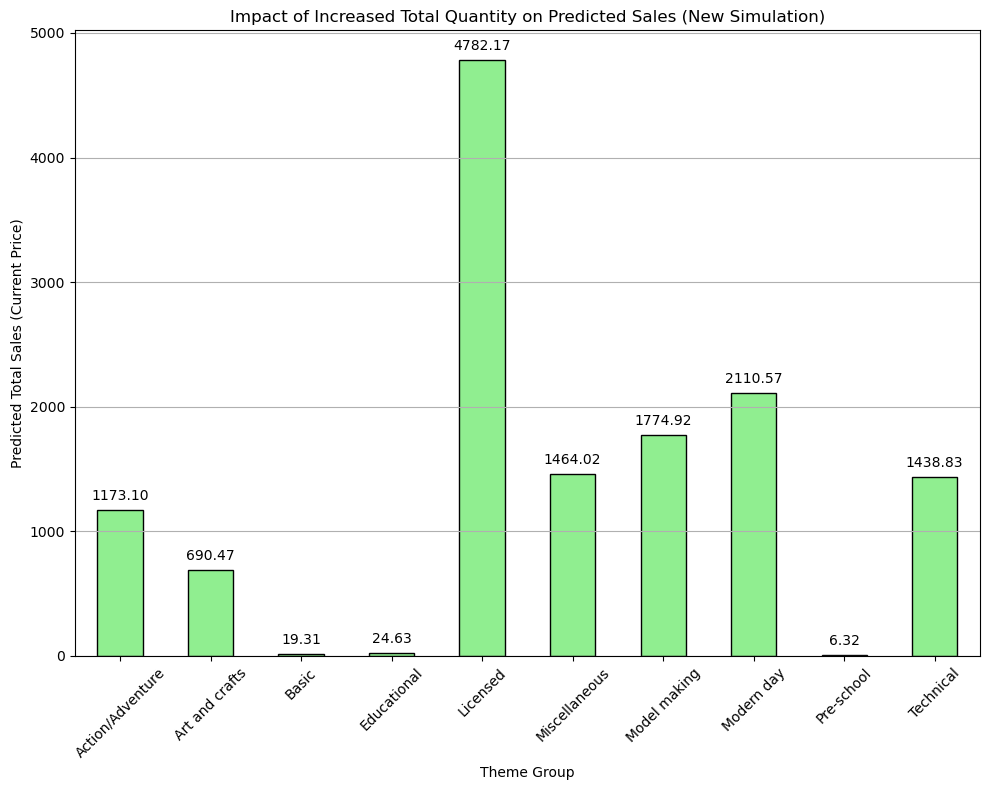

Theme_Group
Licensed            4782.167660
Modern day          2110.571943
Model making        1774.920784
Miscellaneous       1464.021798
Technical           1438.826833
Action/Adventure    1173.095022
Art and crafts       690.472004
Educational           24.632236
Basic                 19.305795
Pre-school             6.315100
Name: Predicted_Current_Price, dtype: float64

In [18]:
# Define new percentage increases for specific Theme_Groups
theme_group_increase_new = {
    'Art and crafts': 0.25,  # Increase by 25%
    'Technical': 0.15,       # Increase by 15%
    'Miscellaneous': 0.20,   # Increase by 20%
    'Educational': 0.30,     # Increase by 30%
    'Pre-school': 0.40       # Increase by 40%
}

# Copy the test set for simulation
simulation_data_new = X_test.copy()

# Merge the simulation data with Theme_Group names
simulation_data_new = simulation_data_new.merge(
    model_lego_data_cleaned[['Theme_Group_ID', 'Theme_Group']].drop_duplicates(),
    on='Theme_Group_ID',
    how='left'
)

# Apply the increase in Total_Quantity for the specified Theme_Groups
for theme_group_name, increase in theme_group_increase_new.items():
    simulation_data_new.loc[
        simulation_data_new['Theme_Group'] == theme_group_name, 'Total_Quantity'
    ] *= (1 + increase)

# Standardize the simulated data
simulation_data_new_scaled = scaler.transform(simulation_data_new.drop(columns=['Theme_Group']))

# Predict the sales with increased Total_Quantity
simulated_sales_predictions_new = model.predict(simulation_data_new_scaled)

# Add predictions to the simulation data
simulation_data_new['Predicted_Current_Price'] = simulated_sales_predictions_new

# Aggregate predictions by Theme_Group for analysis
sales_by_theme_group_new = simulation_data_new.groupby('Theme_Group')['Predicted_Current_Price'].sum()

# Plot the impact of increased quantity on sales
plt.figure(figsize=(10, 8))
ax = sales_by_theme_group_new.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.title('Impact of Increased Total Quantity on Predicted Sales (New Simulation)')
plt.xlabel('Theme Group')
plt.ylabel('Predicted Total Sales (Current Price)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("images/Impact of Increased Total Quantity on Predicted Sales (New Simulation)")
plt.show()

# Sort and display actionable insights
sales_by_theme_group_new.sort_values(ascending=False)

#### Results of the New Simulation:
The updated simulation targets mid-performing and emerging Theme_Groups, increasing their Total_Quantity. Here are the results:

- Top Theme Groups (Unaffected by the Simulation):
  - Licensed: Predicted total sales 4,782.17 (unchanged).
  - Modern day: Predicted total sales 2,110.57 (unchanged).
  - Model making: Predicted total sales 1,774.92 (unchanged).
  
- Impacted Theme Groups:
  - Miscellaneous: Predicted total sales increased slightly to 1,464.02 (+2.28 from the previous simulation).
  - Technical: Predicted total sales reached 1,438.83, slightly lower than the prior simulation.
  - Art and crafts: Predicted sales remained similar at 690.47, despite the increase in quantity.
  
- Minimal Impact Groups:
  - Educational: Predicted sales totaled 24.63 after a 30% increase in quantity.
  - Pre-school: Predicted sales stayed at 6.32, even with a 40% increase.

### Insights and Recommendations:
#### Target High-Impact Themes:
Invest more in Miscellaneous and Technical, as these groups showed positive responses to increased inventory. Consider promotions or cross-selling opportunities in Art and crafts to enhance its sales impact.

#### Reassess Emerging Groups:
Despite quantity increases, Educational and Pre-school show limited sales growth. Rethink product strategies in these areas, such as focusing on niche markets or targeted campaigns.

#### Refinement:
To maximize ROI, combine inventory boosts with dynamic pricing strategies or enhanced marketing for higher sales conversion rates.




### Predicting Sales with Increased Current_Price for Specific Theme Groups
This simulation analyzed the impact of increasing the Current_Price for selected Theme Groups:

- Licensed: Increased by 10%.
- Modern day: Increased by 15%.
- Model making: Increased by 20%.

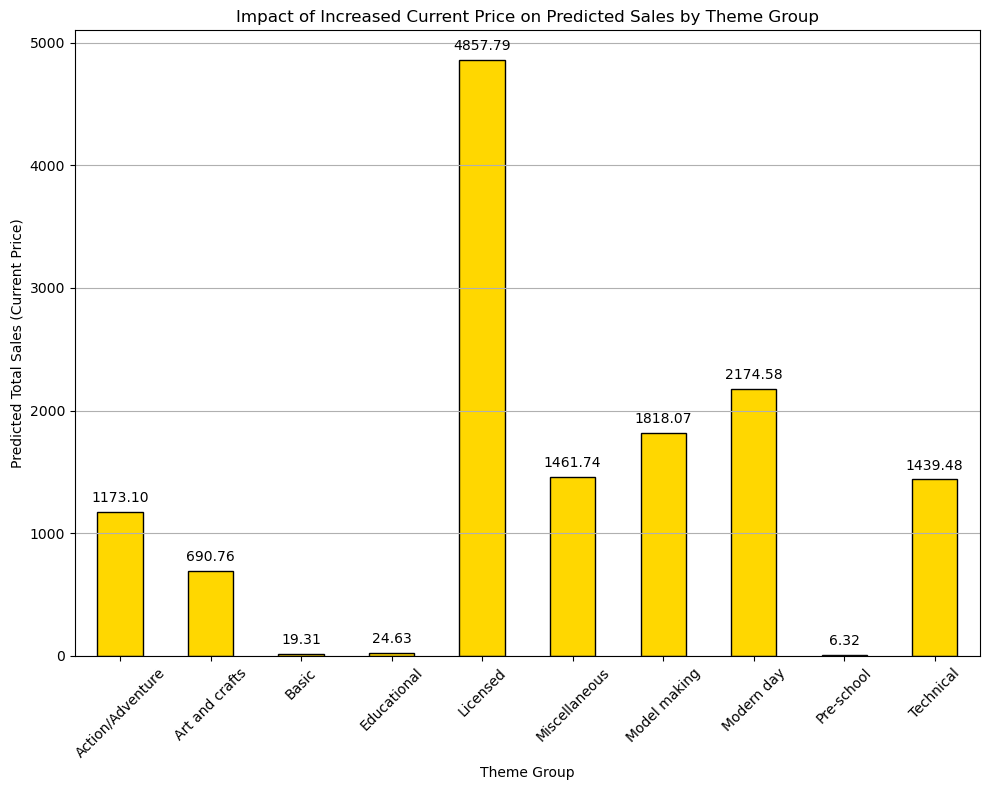

Theme_Group
Licensed            4857.791981
Modern day          2174.578463
Model making        1818.071662
Miscellaneous       1461.738953
Technical           1439.475379
Action/Adventure    1173.095022
Art and crafts       690.763653
Educational           24.632236
Basic                 19.305795
Pre-school             6.315100
Name: Predicted_Current_Price, dtype: float64

In [19]:
# Define percentage increases for Current_Price by Theme_Group
price_increase_scenario = {
    'Licensed': 0.10,         # Increase Current_Price by 10%
    'Modern day': 0.15,       # Increase Current_Price by 15%
    'Model making': 0.20      # Increase Current_Price by 20%
}

# Create a copy of the test set for simulation
simulation_price_data = X_test.copy()

# Merge the simulation data with Theme_Group names
simulation_price_data = simulation_price_data.merge(
    model_lego_data_cleaned[['Theme_Group_ID', 'Theme_Group']].drop_duplicates(),
    on='Theme_Group_ID',
    how='left'
)

# Apply the increase in Current_Price for the specified Theme_Groups
for theme_group_name, increase in price_increase_scenario.items():
    simulation_price_data.loc[
        simulation_price_data['Theme_Group'] == theme_group_name, 'Lag_Current_Price'
    ] *= (1 + increase)

# Standardize the simulated data
simulation_price_data_scaled = scaler.transform(simulation_price_data.drop(columns=['Theme_Group']))

# Predict the sales with increased Current_Price
simulated_price_predictions = model.predict(simulation_price_data_scaled)

# Add predictions to the simulation data
simulation_price_data['Predicted_Current_Price'] = simulated_price_predictions

# Aggregate predictions by Theme_Group for analysis
sales_by_theme_group_price = simulation_price_data.groupby('Theme_Group')['Predicted_Current_Price'].sum()

# Plot the impact of increased Current_Price on sales
plt.figure(figsize=(10, 8))
ax = sales_by_theme_group_price.plot(kind='bar', color='gold', edgecolor='black')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')

plt.title('Impact of Increased Current Price on Predicted Sales by Theme Group')
plt.xlabel('Theme Group')
plt.ylabel('Predicted Total Sales (Current Price)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("images/Impact of Increased Current Price on Predicted Sales by Theme Group.png")
plt.show()

# Display the results of the price increase scenario
sales_by_theme_group_price.sort_values(ascending=False)

### Results of the Simulation:
#### Licensed:
Predicted sales increased to 4,857.79, up from the previous simulations, confirming its strong elasticity.
#### Modern day:
Predicted sales rose to 2,174.58, reflecting significant sensitivity to price changes.
#### Model making:
Predicted sales climbed to 1,818.07, highlighting the potential for additional profitability through modest price increases.
#### Other Theme Groups:
Themes like Miscellaneous and Technical remained unaffected, as their prices were not adjusted in this scenario.

### Key Insights:
#### High Elasticity:
Themes like Licensed and Modern day demonstrated robust sales growth even with increased prices, suggesting untapped profitability.
#### Targeted Increases:
For themes like Model making, moderate price adjustments can drive profitability while maintaining competitive demand.
#### Stable Themes:
Groups like Miscellaneous and Art and crafts may not show significant sensitivity to price adjustments, requiring other strategies like bundling or targeted promotions.
